In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

2023-10-31 14:23:28.767556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 14:23:28.767608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 14:23:28.768917: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 14:23:28.907765: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = load_model('temp/checkpoint/convnet05.h5')

2023-10-25 14:52:46.003412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 14:52:46.009575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 14:52:46.009635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 14:52:46.012668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 14:52:46.012732: I tensorflow/compile

In [3]:
label_names =  ['angry_alpaca_sas.tmp',
                'angry_bear_sas.tmp',
                'angry_bobcat_sas.tmp',
                'angry_camel_sas.tmp',
                'angry_cheetah_sas.tmp',
                'angry_deer_sas.tmp',
                'angry_dingo_a.tmp',
                'angry_goat_sas.tmp',
                'angry_gorilla_t.tmp',
                'angry_hare_sas.tmp',
                'angry_jackal_a.tmp',
                'angry_jaguar_sas.tmp',
                'angry_kangaroo_a.tmp',
                'angry_lion_t.tmp',
                'angry_mandrill_t.tmp',
                'angry_marmot_t.tmp',
                'angry_mink_sas.tmp',
                'angry_mole_t.tmp',
                'angry_mouse_t.tmp',
                'angry_puma_sas.tmp',
                'angry_rat_t.tmp',
                'angry_starling_ti.tmp',
                'angry_weasel_sas.tmp',
                'angry_wolf_sas.tmp',
                'angry_zebra_sas.tmp']

In [4]:
data = np.load('training_data/data04_2500_test.npy')
labels = np.load('training_data/labels04_2500_test.npy')

In [5]:
x = data
y = labels[:,0]

In [6]:
yh = model.predict(x).argmax(1)
prediction = pd.DataFrame()
prediction['yh'] = yh
prediction['y'] = y
ix = (prediction.y != prediction.yh)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

2023-10-25 14:52:51.462829: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2023-10-25 14:52:51.793060: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2023-10-25 14:52:56.873672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


79/79 [==============================] - 10s 9ms/step
1090 testing mistakes of 2500 total predictions
test error rate 0.436
Accuracy 0.564


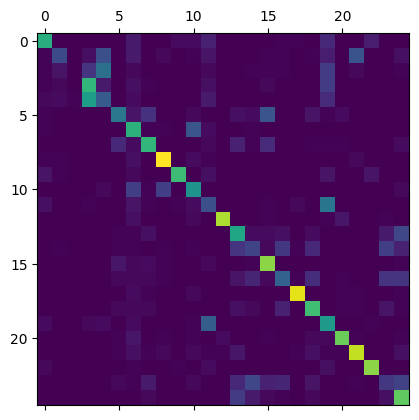

In [8]:
cm = confusion_matrix(y, yh)
plt.matshow(cm)
plt.show()

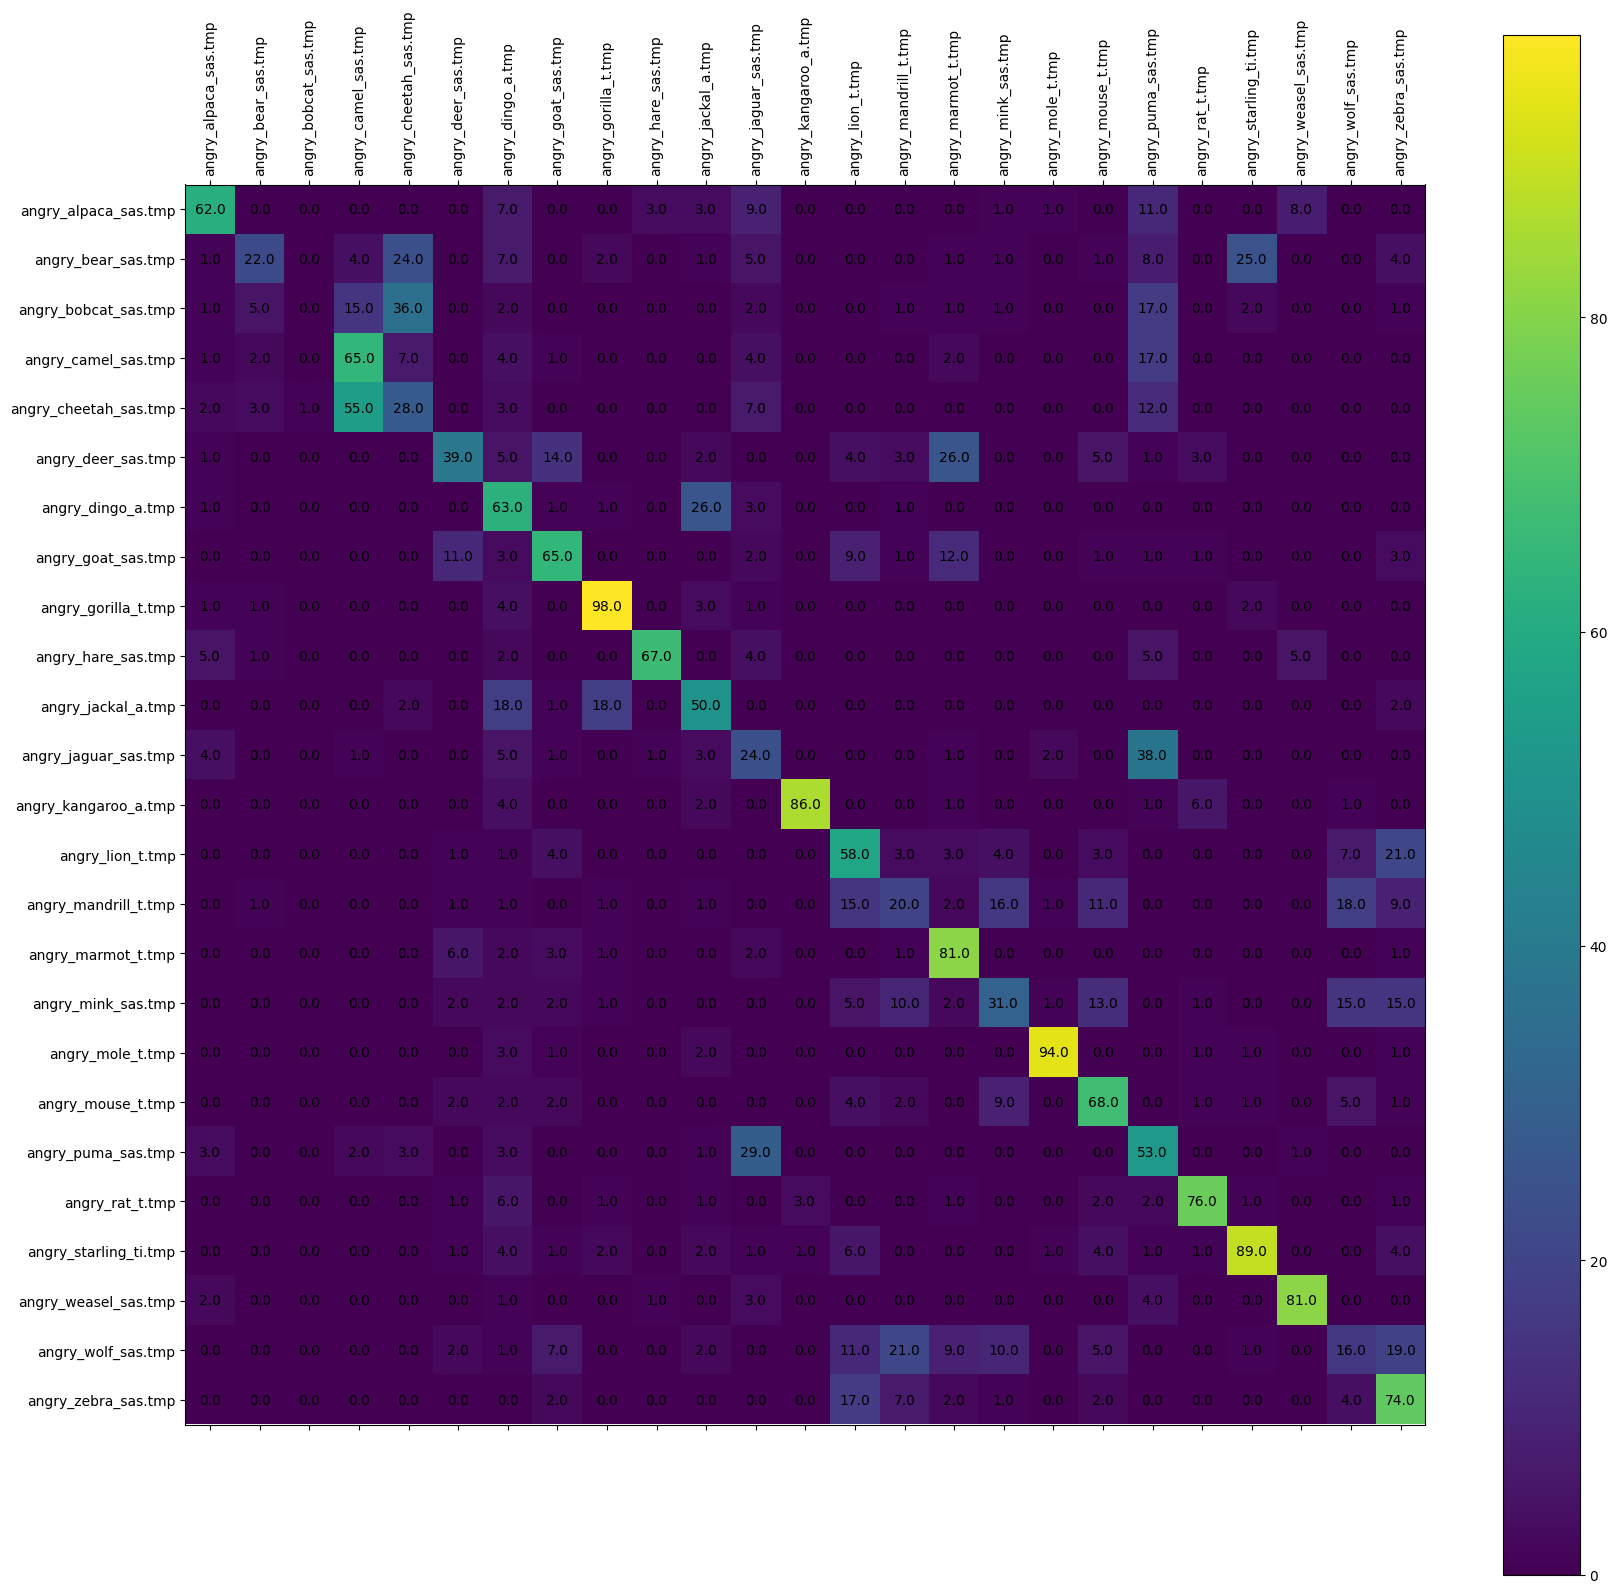

In [10]:
cm = confusion_matrix(y, yh)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest')
fig.colorbar(cax)
plt.xticks(rotation=90, ha='center')
plt.xticks(np.arange(0, max(y)+1, 1.0))
plt.yticks(np.arange(0, max(y)+1, 1.0))
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)


for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()